# Retrieval-Augmented Shopping Assistant - EDA

This notebook explores the ABO dataset for initial insights.

In [21]:
import pandas as pd

In [22]:
# Load ABO image dataset
df_img = pd.read_csv("/kaggle/input/amazon-berkeley-objects/images/metadata/images.csv")  # or csv if applicable

(398212, 4)
Index(['image_id', 'height', 'width', 'path'], dtype='object')
image_id    object
height       int64
width        int64
path        object
dtype: object
image_id    398212
height      398212
width       398212
path        398212
dtype: int64


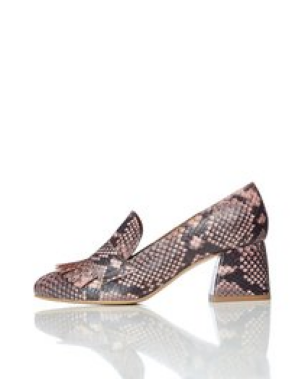

In [23]:
# 1. Check structure
print(df_img.shape)
print(df_img.columns)
print(df_img.dtypes)

# 2. Check missing values
print(df_img.notnull().sum())

# 3. Sample record
df_img.sample(5)

# 4. (If possible) display an image
from PIL import Image
import matplotlib.pyplot as plt

img_loc = str(df_img.loc[df_img['path']== '8c/8ccb5859.jpg']['path']).split()[1]
img_path = '/kaggle/input/amazon-berkeley-objects/images/small/' + img_loc  # based on image_id field
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
# Load ABO metadata dataset

import os, glob
full_metadata = pd.DataFrame()
for json_file in glob.glob("/kaggle/input/listing/listings/metadata/*.json"):
    print('Loading file: ' + json_file + '\n')
    df_metadata = pd.read_json(json_file, lines = True)
    full_metadata = pd.concat([full_metadata, df_metadata])

Loading file: /kaggle/input/listing/listings/metadata/listings_3.json

Loading file: /kaggle/input/listing/listings/metadata/listings_d.json

Loading file: /kaggle/input/listing/listings/metadata/listings_b.json

Loading file: /kaggle/input/listing/listings/metadata/listings_a.json

Loading file: /kaggle/input/listing/listings/metadata/listings_4.json

Loading file: /kaggle/input/listing/listings/metadata/listings_8.json

Loading file: /kaggle/input/listing/listings/metadata/listings_9.json

Loading file: /kaggle/input/listing/listings/metadata/listings_f.json

Loading file: /kaggle/input/listing/listings/metadata/listings_0.json

Loading file: /kaggle/input/listing/listings/metadata/listings_6.json

Loading file: /kaggle/input/listing/listings/metadata/listings_c.json

Loading file: /kaggle/input/listing/listings/metadata/listings_2.json

Loading file: /kaggle/input/listing/listings/metadata/listings_5.json

Loading file: /kaggle/input/listing/listings/metadata/listings_1.json

Loadin

In [25]:
# 1. Check structure
print(full_metadata.shape)
print(full_metadata.columns)
print(full_metadata.dtypes)

(147702, 28)
Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type'],
      dtype='object')
brand                  object
bullet_point           object
color                  object
item_id                object
item_name              object
item_weight            object
material               object
model_name             object
model_number           object
product_type           object
main_image_id          object
other_image_id         object
item_keywords          object
country                object
marketplace            object
domain_name            object
node                   object
style                

In [26]:
# 2. Check missing values
print(full_metadata.notnull().sum())

brand                  147643
bullet_point           131570
color                  116180
item_id                147702
item_name              147702
item_weight            106194
material                53585
model_name              81579
model_number           124091
product_type           147702
main_image_id          147127
other_image_id         137976
item_keywords          126776
country                147702
marketplace            147702
domain_name            147702
node                   140749
style                   43188
item_dimensions         43338
model_year               7765
color_code              18243
spin_id                  8222
3dmodel_id               7960
fabric_type              8193
item_shape               5066
pattern                  4590
product_description      4240
finish_type              1536
dtype: int64


From above, "finish_type" column has the lowest number of values present i.e. 1536 out of 147702 product entries.

In [ ]:
print(full_metadata.loc[full_metadata['item_id'] == 'B07TGZZMDK'])

In [27]:
# 3. Sample record
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
#full_metadata.sample(5)

From above, it is clear that:
1. Only **item_name** column is present for all products.
2. We will use **item_name** to filter for in scope language - English.

In [ ]:
# 4. Display an image using image id from the metadata

from PIL import Image
import matplotlib.pyplot as plt
print(full_metadata.loc[full_metadata['main_image_id'] == '81iZlv3bjpL'])
img_path = full_metadata.loc[full_metadata['main_image_id'] == '81iZlv3bjpL']
img_id = img_path.iloc[0]['main_image_id']
img_location = str(df_img.loc[df_img['image_id'] == img_id]['path'])
img = Image.open('/kaggle/input/amazon-berkeley-objects/images/small/' + img_location.split()[1])
plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
# Analyse the number of languages supported. US-English in scope only.
count_US_lang_key = 0
count_prodDesc = 0
count_total=0
lang_set = set()
for val in full_metadata['item_name']:
    count_total += 1
    for key, value in val[0].items():
        if(key == 'language_tag'):
            lang_set.add(value)
print(lang_set)

{'cs_CZ', 'es_US', 'he_IL', 'en_IN', 'fr_CA', 'zh_TW', 'te_IN', 'ar_AE', 'de_DE', 'fr_FR', 'zh_CN', 'en_SG', 'pt_BR', 'pl_PL', 'es_ES', 'hi_IN', 'ja_JP', 'en_CA', 'ml_IN', 'es_MX', 'kn_IN', 'sv_SE', 'nl_NL', 'en_AE', 'tr_TR', 'en_GB', 'ko_KR', 'en_US', 'en_AU', 'it_IT'}


Amongst these, only English language will be used. i.e,
en_SG,
en_CA,
en_AU,
en_GB, 
en_AE, 
en_US,
en_IN

In [29]:
# Analyse the number of languages supported. US-English in scope only.
countTotalProdDesc = 0
countTotalEngDesc = 0
for val in full_metadata['item_name']:
    for key, value in val[0].items():
        if(key == 'language_tag'and value in ('en_SG', 'en_CA','en_AU','en_GB','en_AE','en_US','en_IN')):
            #list_items = list(val[0].items())
            #print(list_items[1])
            countTotalEngDesc += 1
        countTotalProdDesc += 1 

print('countTotalEngDesc: ', countTotalEngDesc)
print('countTotalProdDesc: ', countTotalProdDesc)
print('Percentage of data under scope:', countTotalEngDesc/countTotalProdDesc * 100)

countTotalEngDesc:  106474
countTotalProdDesc:  295528
Percentage of data under scope: 36.02839663246799


In [30]:
# Reduce the metadata to in scope languages only

# Step 1: Store indices of rows that match the language criteria
matching_indices = []

valid_languages = {'en_SG', 'en_CA','en_AU','en_GB','en_AE','en_US','en_IN'}

for idx, row in full_metadata.iterrows():
    item_name = row['item_name']
    if isinstance(item_name, list):
        if any(d.get('language_tag') in valid_languages for d in item_name if isinstance(d, dict)):
            matching_indices.append(idx)

# Step 2: Filter all at once using .iloc
inScopeMetadata = full_metadata.iloc[matching_indices].reset_index(drop=True)

In [31]:
def auto_flatten_json_columns(df, keys_to_try=['value', 'name']):
    """
    Detects and flattens columns containing lists of JSON objects,
    extracting specified keys.
    Adds new columns with a `_flat` suffix.
    """
    def extract_from_list(ld, keys):
        if isinstance(ld, list):
            for key in keys:
                values = [str(d.get(key)) for d in ld if isinstance(d, dict) and key in d]
                if values:  # found at least one valid value
                    return ", ".join(values)
        return None

    # Track flattened columns
    flattened = []

    for col in df.columns:
        sample = df[col].iloc[0]
        if isinstance(sample, list) and all(isinstance(i, dict) for i in sample):
            flat_col = f"{col}_flat"
            df[flat_col] = df[col].apply(lambda x: extract_from_list(x, keys_to_try))
            flattened.append(flat_col)

    return df, flattened

In [32]:
print(inScopeMetadata.shape)

(122734, 28)


In [33]:
inScopeMetadata, flattened_cols = auto_flatten_json_columns(inScopeMetadata)
print("Flattened columns:", flattened_cols)


Flattened columns: ['brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat', 'item_weight_flat', 'material_flat', 'model_name_flat', 'model_number_flat', 'product_type_flat', 'item_keywords_flat', 'node_flat']


In [34]:
print(inScopeMetadata.columns)

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type',
       'brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat',
       'item_weight_flat', 'material_flat', 'model_name_flat',
       'model_number_flat', 'product_type_flat', 'item_keywords_flat',
       'node_flat'],
      dtype='object')


In [45]:
# Construct the Embedding Input Text

embedding_cols = [
    'item_name_flat',
    'brand_flat',
    'product_type_flat',
    'material_flat',
    'bullet_point_flat',
    'color_flat',
    'item_keywords_flat'
]

inScopeMetadata['embedding_input'] = inScopeMetadata[embedding_cols].fillna('').agg(' '.join, axis=1)

In [36]:
inScopeMetadata.notnull().sum()

brand                  122699
bullet_point           109787
color                   96330
item_id                122734
item_name              122734
item_weight             88656
material                44673
model_name              68180
model_number           103348
product_type           122734
main_image_id          122240
other_image_id         114450
item_keywords          106357
country                122734
marketplace            122734
domain_name            122734
node                   116782
style                   36155
item_dimensions         36028
model_year               6107
color_code              15556
spin_id                  7354
3dmodel_id               7194
fabric_type              6880
item_shape               3927
pattern                  4002
product_description      3202
finish_type              1355
brand_flat             122699
bullet_point_flat      109787
color_flat              96330
item_name_flat         122734
item_weight_flat        88656
material_f

In [47]:
#Serialize to parquet/persistent storage

inScopeMetadata.to_parquet("inScopeMetadata_with_embeddings.parquet", index=False)


With above copies, we have:

1. faiss_index.index → FAISS binary index
2. inScopeMetadata_with_embeddings.parquet → all metadata + embedding inputs
3. embedding_matrix.npy → optional fallback